In [815]:
import pandas as pd

In [816]:
df = pd.read_csv('/content/train01.csv', encoding='latin-1')
df

,y,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Is_the_order_deleted,Purchasing_Document_Item _Date,Material_Number,Net_Price_in_Purchasing_Document_(in Document Currency),Account_Assignment_Category,Central_Deletion_Flag_for_Master_Record,Central_posting_block,Centrally_imposed_purchasing_block,Indicator:_Alternative_payee_in_document_allowed?,Created_On,Flag_Material_for_Deletion_at_Client_Level,Base_Unit_of_Measure,Net_Weight
0,502752,4220031299,10,NaN,1/4/2021,NaN,10000,Partnership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500296,4220031271,10,NaN,1/4/2021,NaN,10000,Partnership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,503611B,4220031258,10,NaN,1/4/2021,NaN,10000,Partnership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,503174,4230001743,80,NaN,1/4/2021,NaN,10000,Partnership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500862,4220033718,20,NaN,1/4/2021,NaN,44000,Partnership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59210,930982,4500170725,20,NaN,9/29/2023,8038233,10000,Vendor,NaN,NaN,NaN,NaN,9/13/2022,NaN,UN,0.0
59211,505100,4210140417,10,NaN,9/30/2023,NaN,10000,Partnership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59212,505100,4210140418,10,NaN,9/30/2023,NaN,10000,Partnership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59213,503600,4210140420,10,NaN,9/30/2023,NaN,10000,Partnership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [817]:
columns_to_fill = ['Central_Deletion_Flag_for_Master_Record',
                   'Central_posting_block',
                   'Centrally_imposed_purchasing_block',
                   'Indicator:_Alternative_payee_in_document_allowed?',
                   'Flag_Material_for_Deletion_at_Client_Level']


In [818]:
import pandas as pd

# Assuming df is your DataFrame and 'Material_Number' is the column you want to modify

# Replace NA values with 0
df['Material_Number'] = df['Material_Number'].fillna(0)

# Replace string values with 0
df['Material_Number'] = df['Material_Number'].apply(lambda x: 0 if isinstance(x, str) else x)


In [819]:
df['Purchasing_Document_Item _Date'] = pd.to_datetime(df['Purchasing_Document_Item _Date'], errors='coerce')
df['Day'] = df['Purchasing_Document_Item _Date'].dt.day
df['Month'] = df['Purchasing_Document_Item _Date'].dt.month
df['Year'] = df['Purchasing_Document_Item _Date'].dt.year

In [820]:
for col in columns_to_fill:
    df[col] = df[col].fillna(0).replace({'yes': 1})

In [821]:

id_counts = df['y'].value_counts()

# Print the counts
id_counts

y
930960     1765
930131     1063
930590     1053
931895     1025
261403      969
           ... 
510877        1
13336         1
271418A       1
507666        1
505994        1
Name: count, Length: 3667, dtype: int64

In [822]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the IDs

# Calculate the count of each ID and create a new column with the counts
df['ID_Count'] = df.groupby('y')['y'].transform('count')

# Now 'df' contains a new column 'ID_Count' with the count of each ID
print(df[['y', 'ID_Count']])


             y  ID_Count
0       502752         7
1       500296         1
2      503611B        98
3       503174         9
4       500862        48
...        ...       ...
59210   930982       225
59211   505100        70
59212   505100        70
59213   503600        11
59214   505994         1

[59215 rows x 2 columns]


In [823]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the IDs and their counts in the 'ID_Count' column

# Assign scores based on count
def assign_score(count):
    if 0 <= count <= 150:
        return 1
    elif 151 <= count <= 500:
        return 2
    else:
        return 3

# Create the new 'ID_Score' column based on the count
df['ID_Score'] = df['ID_Count'].apply(assign_score)

# Now 'df' contains a new column 'ID_Score' with scores based on count
print(df[['y', 'ID_Count', 'ID_Score']])
df

             y  ID_Count  ID_Score
0       502752         7         1
1       500296         1         1
2      503611B        98         1
3       503174         9         1
4       500862        48         1
...        ...       ...       ...
59210   930982       225         2
59211   505100        70         1
59212   505100        70         1
59213   503600        11         1
59214   505994         1         1

[59215 rows x 3 columns]


,y,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Is_the_order_deleted,Purchasing_Document_Item _Date,Material_Number,Net_Price_in_Purchasing_Document_(in Document Currency),Account_Assignment_Category,Central_Deletion_Flag_for_Master_Record,Central_posting_block,...,Indicator:_Alternative_payee_in_document_allowed?,Created_On,Flag_Material_for_Deletion_at_Client_Level,Base_Unit_of_Measure,Net_Weight,Day,Month,Year,ID_Count,ID_Score
0,502752,4220031299,10,NaN,2021-01-04,0,10000,Partnership,0,0,...,0,NaN,0,NaN,NaN,4,1,2021,7,1
1,500296,4220031271,10,NaN,2021-01-04,0,10000,Partnership,0,0,...,0,NaN,0,NaN,NaN,4,1,2021,1,1
2,503611B,4220031258,10,NaN,2021-01-04,0,10000,Partnership,0,0,...,0,NaN,0,NaN,NaN,4,1,2021,98,1
3,503174,4230001743,80,NaN,2021-01-04,0,10000,Partnership,0,0,...,0,NaN,0,NaN,NaN,4,1,2021,9,1
4,500862,4220033718,20,NaN,2021-01-04,0,44000,Partnership,0,0,...,0,NaN,0,NaN,NaN,4,1,2021,48,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59210,930982,4500170725,20,NaN,2023-09-29,0,10000,Vendor,0,0,...,0,9/13/2022,0,UN,0.0,29,9,2023,225,2
59211,505100,4210140417,10,NaN,2023-09-30,0,10000,Partnership,0,0,...,0,NaN,0,NaN,NaN,30,9,2023,70,1
59212,505100,4210140418,10,NaN,2023-09-30,0,10000,Partnership,0,0,...,0,NaN,0,NaN,NaN,30,9,2023,70,1
59213,503600,4210140420,10,NaN,2023-09-30,0,10000,Partnership,0,0,...,0,NaN,0,NaN,NaN,30,9,2023,11,1


In [824]:
# prompt: wanna remove the one with score 1

df = df.drop(df.loc[df['ID_Score'] == 1].index)
df

,y,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Is_the_order_deleted,Purchasing_Document_Item _Date,Material_Number,Net_Price_in_Purchasing_Document_(in Document Currency),Account_Assignment_Category,Central_Deletion_Flag_for_Master_Record,Central_posting_block,...,Indicator:_Alternative_payee_in_document_allowed?,Created_On,Flag_Material_for_Deletion_at_Client_Level,Base_Unit_of_Measure,Net_Weight,Day,Month,Year,ID_Count,ID_Score
17,500103,4210112325,10,NaN,2021-01-05,0,5130,Partnership,0,0,...,0,NaN,0,NaN,NaN,5,1,2021,265,2
20,502240,4210112375,10,NaN,2021-01-06,0,10000,Partnership,0,0,...,0,NaN,0,NaN,NaN,6,1,2021,281,2
41,504152,4210109942,20,NaN,2021-01-07,0,10000,Partnership,0,0,...,0,NaN,0,NaN,NaN,7,1,2021,183,2
44,500262A,4210112481,10,NaN,2021-01-08,0,10000,Partnership,0,0,...,0,NaN,0,NaN,NaN,8,1,2021,512,3
45,506524A,4210111993,10,NaN,2021-01-08,0,5130,Partnership,0,0,...,0,NaN,0,NaN,NaN,8,1,2021,153,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59179,600320,4210140397,10,NaN,2023-09-29,0,10000,Vendor,0,0,...,0,12/18/2007,0,UN,0.0,29,9,2023,331,2
59180,600320,4210140397,20,NaN,2023-09-29,0,10000,Vendor,0,0,...,0,3/17/2016,0,UN,0.0,29,9,2023,331,2
59197,500872,4210140413,10,NaN,2023-09-29,0,838040,Partnership,0,0,...,0,NaN,0,NaN,NaN,29,9,2023,161,2
59206,500424B,4210139929,20,NaN,2023-09-29,0,5000,Vendor,0,0,...,0,12/3/2005,0,M,0.0,29,9,2023,163,2


In [825]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Reshape the data to 2D array
net_price_reshaped = df['Net_Price_in_Purchasing_Document_(in Document Currency)'].values.reshape(-1, 1)

# Scale the 'Net_Price_in_Purchasing_Document_(in Document Currency)' column
df['Normalized_Net_Price'] = min_max_scaler.fit_transform(net_price_reshaped)

# Flatten the array back if needed directly into the DataFrame
df['Normalized_Net_Price'] = df['Normalized_Net_Price'].ravel()
df

,y,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Is_the_order_deleted,Purchasing_Document_Item _Date,Material_Number,Net_Price_in_Purchasing_Document_(in Document Currency),Account_Assignment_Category,Central_Deletion_Flag_for_Master_Record,Central_posting_block,...,Created_On,Flag_Material_for_Deletion_at_Client_Level,Base_Unit_of_Measure,Net_Weight,Day,Month,Year,ID_Count,ID_Score,Normalized_Net_Price
17,500103,4210112325,10,NaN,2021-01-05,0,5130,Partnership,0,0,...,NaN,0,NaN,NaN,5,1,2021,265,2,6.721415e-07
20,502240,4210112375,10,NaN,2021-01-06,0,10000,Partnership,0,0,...,NaN,0,NaN,NaN,6,1,2021,281,2,2.585160e-05
41,504152,4210109942,20,NaN,2021-01-07,0,10000,Partnership,0,0,...,NaN,0,NaN,NaN,7,1,2021,183,2,2.585160e-05
44,500262A,4210112481,10,NaN,2021-01-08,0,10000,Partnership,0,0,...,NaN,0,NaN,NaN,8,1,2021,512,3,2.585160e-05
45,506524A,4210111993,10,NaN,2021-01-08,0,5130,Partnership,0,0,...,NaN,0,NaN,NaN,8,1,2021,153,2,6.721415e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59179,600320,4210140397,10,NaN,2023-09-29,0,10000,Vendor,0,0,...,12/18/2007,0,UN,0.0,29,9,2023,331,2,2.585160e-05
59180,600320,4210140397,20,NaN,2023-09-29,0,10000,Vendor,0,0,...,3/17/2016,0,UN,0.0,29,9,2023,331,2,2.585160e-05
59197,500872,4210140413,10,NaN,2023-09-29,0,838040,Partnership,0,0,...,NaN,0,NaN,NaN,29,9,2023,161,2,4.307083e-03
59206,500424B,4210139929,20,NaN,2023-09-29,0,5000,Vendor,0,0,...,12/3/2005,0,M,0.0,29,9,2023,163,2,0.000000e+00


In [826]:
df['created'] = df['Created_On'].notnull().astype(int)

# Print the updated DataFrame
df

,y,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Is_the_order_deleted,Purchasing_Document_Item _Date,Material_Number,Net_Price_in_Purchasing_Document_(in Document Currency),Account_Assignment_Category,Central_Deletion_Flag_for_Master_Record,Central_posting_block,...,Flag_Material_for_Deletion_at_Client_Level,Base_Unit_of_Measure,Net_Weight,Day,Month,Year,ID_Count,ID_Score,Normalized_Net_Price,created
17,500103,4210112325,10,NaN,2021-01-05,0,5130,Partnership,0,0,...,0,NaN,NaN,5,1,2021,265,2,6.721415e-07,0
20,502240,4210112375,10,NaN,2021-01-06,0,10000,Partnership,0,0,...,0,NaN,NaN,6,1,2021,281,2,2.585160e-05,0
41,504152,4210109942,20,NaN,2021-01-07,0,10000,Partnership,0,0,...,0,NaN,NaN,7,1,2021,183,2,2.585160e-05,0
44,500262A,4210112481,10,NaN,2021-01-08,0,10000,Partnership,0,0,...,0,NaN,NaN,8,1,2021,512,3,2.585160e-05,0
45,506524A,4210111993,10,NaN,2021-01-08,0,5130,Partnership,0,0,...,0,NaN,NaN,8,1,2021,153,2,6.721415e-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59179,600320,4210140397,10,NaN,2023-09-29,0,10000,Vendor,0,0,...,0,UN,0.0,29,9,2023,331,2,2.585160e-05,1
59180,600320,4210140397,20,NaN,2023-09-29,0,10000,Vendor,0,0,...,0,UN,0.0,29,9,2023,331,2,2.585160e-05,1
59197,500872,4210140413,10,NaN,2023-09-29,0,838040,Partnership,0,0,...,0,NaN,NaN,29,9,2023,161,2,4.307083e-03,0
59206,500424B,4210139929,20,NaN,2023-09-29,0,5000,Vendor,0,0,...,0,M,0.0,29,9,2023,163,2,0.000000e+00,1


In [827]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'Account_Assignment_Category' column
# Perform one-hot encoding on the 'Account_Assignment_Category' column
df_encoded = pd.get_dummies(df['Account_Assignment_Category'])

# Convert boolean values to integers (0 and 1)
df_encoded = df_encoded.astype(int)
df = pd.concat([df, df_encoded], axis=1)




In [828]:
df['Base_Unit_of_Measure'] = df['Base_Unit_of_Measure'].fillna('UN')
encoded = pd.get_dummies(df['Base_Unit_of_Measure'])
encoded = encoded.astype(int)
df = pd.concat([df, encoded], axis=1)

In [829]:
df

,y,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Is_the_order_deleted,Purchasing_Document_Item _Date,Material_Number,Net_Price_in_Purchasing_Document_(in Document Currency),Account_Assignment_Category,Central_Deletion_Flag_for_Master_Record,Central_posting_block,...,ID_Score,Normalized_Net_Price,created,Partnership,Vendor,KG,L,M,M2,UN
17,500103,4210112325,10,NaN,2021-01-05,0,5130,Partnership,0,0,...,2,6.721415e-07,0,1,0,0,0,0,0,1
20,502240,4210112375,10,NaN,2021-01-06,0,10000,Partnership,0,0,...,2,2.585160e-05,0,1,0,0,0,0,0,1
41,504152,4210109942,20,NaN,2021-01-07,0,10000,Partnership,0,0,...,2,2.585160e-05,0,1,0,0,0,0,0,1
44,500262A,4210112481,10,NaN,2021-01-08,0,10000,Partnership,0,0,...,3,2.585160e-05,0,1,0,0,0,0,0,1
45,506524A,4210111993,10,NaN,2021-01-08,0,5130,Partnership,0,0,...,2,6.721415e-07,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59179,600320,4210140397,10,NaN,2023-09-29,0,10000,Vendor,0,0,...,2,2.585160e-05,1,0,1,0,0,0,0,1
59180,600320,4210140397,20,NaN,2023-09-29,0,10000,Vendor,0,0,...,2,2.585160e-05,1,0,1,0,0,0,0,1
59197,500872,4210140413,10,NaN,2023-09-29,0,838040,Partnership,0,0,...,2,4.307083e-03,0,1,0,0,0,0,0,1
59206,500424B,4210139929,20,NaN,2023-09-29,0,5000,Vendor,0,0,...,2,0.000000e+00,1,0,1,0,0,1,0,0


In [843]:
df['ID_'] = df.groupby('Purchasing_Document_Number')['Purchasing_Document_Number'].transform('count')

# Now 'df' contains a new column 'ID_Count' with the count of each ID
print(df[['Purchasing_Document_Number', 'ID_']])

       Purchasing_Document_Number  ID_
17                     4210112325    1
20                     4210112375    1
41                     4210109942    1
44                     4210112481  144
45                     4210111993    1
...                           ...  ...
59179                  4210140397    2
59180                  4210140397    2
59197                  4210140413    1
59206                  4210139929    2
59210                  4500170725    2

[26320 rows x 2 columns]


In [844]:
# prompt: FILL NA Net_Weight WITH THE MEAN

df['Net_Weight']=df['Net_Weight'].fillna(0)
df['Net_Weight'].isna().sum()

0

In [845]:
from sklearn.cluster import KMeans

# Assuming net_price is a DataFrame column containing the net prices
cid = df['ID_']

# Reshape the data to fit KMeans input requirements
X = cid .values.reshape(-1, 1)

# Define the number of clusters
num_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit KMeans model to the data
kmeans.fit(X)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get labels for each data point
labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['cid'] = labels

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Print the DataFrame with cluster labels
print("DataFrame with Cluster Labels:")
df


Cluster Centers:
[[ 10.02525781]
 [ 75.16851202]
 [289.52158895]
 [167.95368957]]
DataFrame with Cluster Labels:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,y,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Is_the_order_deleted,Purchasing_Document_Item _Date,Material_Number,Net_Price_in_Purchasing_Document_(in Document Currency),Account_Assignment_Category,Central_Deletion_Flag_for_Master_Record,Central_posting_block,...,created,Partnership,Vendor,KG,L,M,M2,UN,ID_,cid
17,500103,4210112325,10,NaN,2021-01-05,0,5130,Partnership,0,0,...,0,1,0,0,0,0,0,1,1,0
20,502240,4210112375,10,NaN,2021-01-06,0,10000,Partnership,0,0,...,0,1,0,0,0,0,0,1,1,0
41,504152,4210109942,20,NaN,2021-01-07,0,10000,Partnership,0,0,...,0,1,0,0,0,0,0,1,1,0
44,500262A,4210112481,10,NaN,2021-01-08,0,10000,Partnership,0,0,...,0,1,0,0,0,0,0,1,144,3
45,506524A,4210111993,10,NaN,2021-01-08,0,5130,Partnership,0,0,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59179,600320,4210140397,10,NaN,2023-09-29,0,10000,Vendor,0,0,...,1,0,1,0,0,0,0,1,2,0
59180,600320,4210140397,20,NaN,2023-09-29,0,10000,Vendor,0,0,...,1,0,1,0,0,0,0,1,2,0
59197,500872,4210140413,10,NaN,2023-09-29,0,838040,Partnership,0,0,...,0,1,0,0,0,0,0,1,1,0
59206,500424B,4210139929,20,NaN,2023-09-29,0,5000,Vendor,0,0,...,1,0,1,0,0,1,0,0,2,0


In [846]:
# Assuming 'df' is your DataFrame containing the columns mentioned
# Drop the 'Created_On' and 'Is_the_order_deleted' columns
ds = df.drop(columns=['Created_On','Material_Number', 'Is_the_order_deleted', 'Purchasing_Document_Item _Date', 'Account_Assignment_Category', 'Base_Unit_of_Measure','Central_Deletion_Flag_for_Master_Record',	'Central_posting_block'	,'Centrally_imposed_purchasing_block','Indicator:_Alternative_payee_in_document_allowed?','Flag_Material_for_Deletion_at_Client_Level'])

# Print the DataFrame after dropping the columns

ds


,y,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Net_Price_in_Purchasing_Document_(in Document Currency),Net_Weight,Day,Month,Year,ID_Count,ID_Score,...,created,Partnership,Vendor,KG,L,M,M2,UN,ID_,cid
17,500103,4210112325,10,5130,0.0,5,1,2021,265,2,...,0,1,0,0,0,0,0,1,1,0
20,502240,4210112375,10,10000,0.0,6,1,2021,281,2,...,0,1,0,0,0,0,0,1,1,0
41,504152,4210109942,20,10000,0.0,7,1,2021,183,2,...,0,1,0,0,0,0,0,1,1,0
44,500262A,4210112481,10,10000,0.0,8,1,2021,512,3,...,0,1,0,0,0,0,0,1,144,3
45,506524A,4210111993,10,5130,0.0,8,1,2021,153,2,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59179,600320,4210140397,10,10000,0.0,29,9,2023,331,2,...,1,0,1,0,0,0,0,1,2,0
59180,600320,4210140397,20,10000,0.0,29,9,2023,331,2,...,1,0,1,0,0,0,0,1,2,0
59197,500872,4210140413,10,838040,0.0,29,9,2023,161,2,...,0,1,0,0,0,0,0,1,1,0
59206,500424B,4210139929,20,5000,0.0,29,9,2023,163,2,...,1,0,1,0,0,1,0,0,2,0


In [847]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [848]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame containing the dataset with encoded categorical variables
# Assuming 'y' contains your target variable and 'X' contains your features

# Split data into features (X) and target variable (y)
X = ds.drop(columns=['y'])  # Assuming 'y' is the target variable
y = ds['y']

# Split data into training and testing set

In [849]:
X = X.drop(columns=['ID_Count', 'ID_Score'])
X

,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Net_Price_in_Purchasing_Document_(in Document Currency),Net_Weight,Day,Month,Year,Normalized_Net_Price,created,Partnership,Vendor,KG,L,M,M2,UN,ID_,cid
17,4210112325,10,5130,0.0,5,1,2021,6.721415e-07,0,1,0,0,0,0,0,1,1,0
20,4210112375,10,10000,0.0,6,1,2021,2.585160e-05,0,1,0,0,0,0,0,1,1,0
41,4210109942,20,10000,0.0,7,1,2021,2.585160e-05,0,1,0,0,0,0,0,1,1,0
44,4210112481,10,10000,0.0,8,1,2021,2.585160e-05,0,1,0,0,0,0,0,1,144,3
45,4210111993,10,5130,0.0,8,1,2021,6.721415e-07,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59179,4210140397,10,10000,0.0,29,9,2023,2.585160e-05,1,0,1,0,0,0,0,1,2,0
59180,4210140397,20,10000,0.0,29,9,2023,2.585160e-05,1,0,1,0,0,0,0,1,2,0
59197,4210140413,10,838040,0.0,29,9,2023,4.307083e-03,0,1,0,0,0,0,0,1,1,0
59206,4210139929,20,5000,0.0,29,9,2023,0.000000e+00,1,0,1,0,0,1,0,0,2,0


In [875]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [876]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

# Train the model

dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.8226950354609929


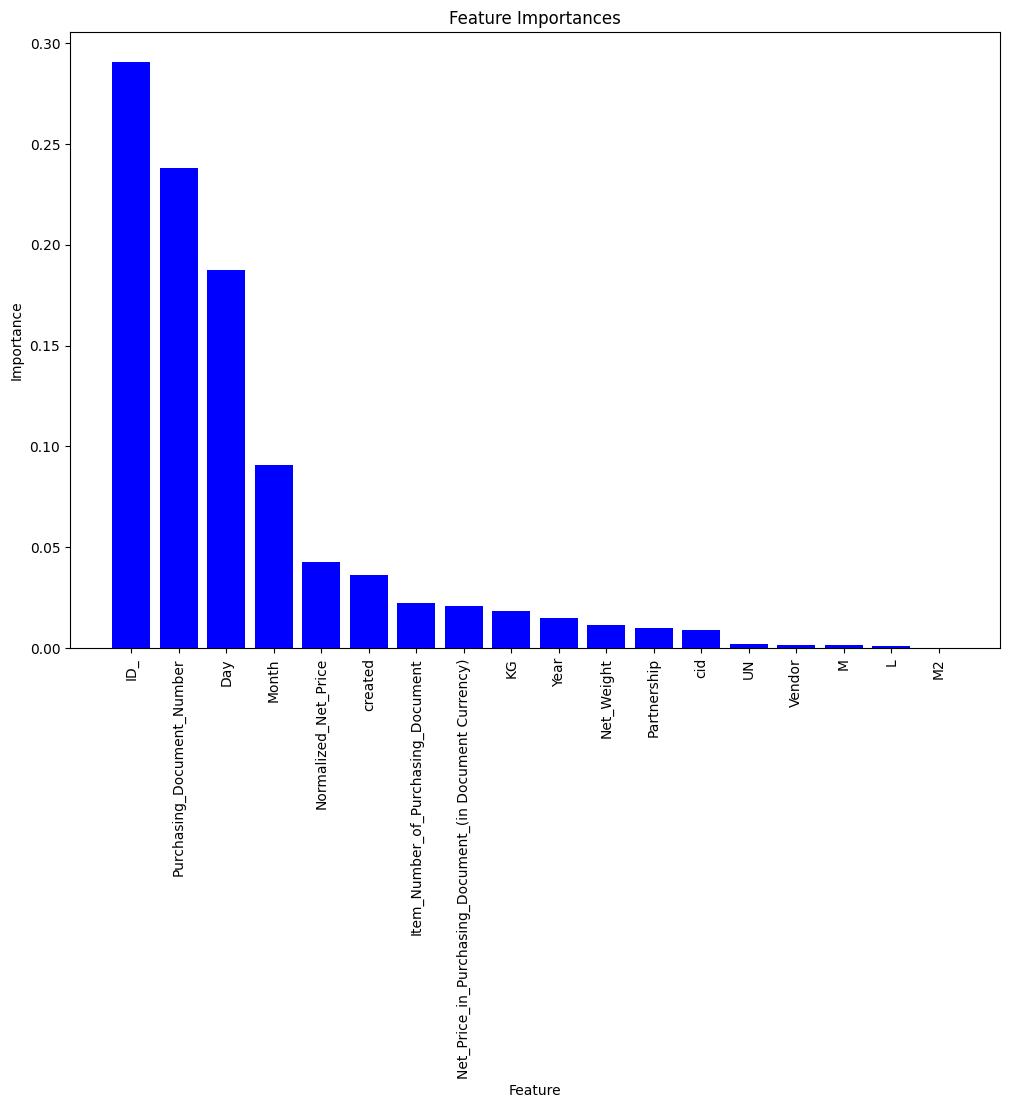

In [852]:
# Get feature importances
importances = dt_classifier .feature_importances_

# Sort the feature importances in descending order and plot
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(len(indices)), importances[indices], color='b', align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [754]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest and Decision Tree classifiers
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()

# Create a list of tuples containing the models to be combined
estimators = [('Random Forest', rf_classifier), ('Decision Tree', dt_classifier)]

# Initialize the Voting Classifier with the list of models
voting_classifier = VotingClassifier(estimators)

# Train the Voting Classifier (ensemble model)
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate the model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)


Voting Classifier Accuracy: 0.7918043621943159


In [854]:
from sklearn.ensemble import VotingClassifier

# Initialize the XGBoost and Decision Tree classifiers
xgb_classifier = XGBClassifier()
dt_classifier = DecisionTreeClassifier()

# Create the hybrid ensemble model
hybrid_model = VotingClassifier(estimators=[('xgb', xgb_classifier), ('dt', dt_classifier)], voting='hard')

# Train the hybrid model on the training data
hybrid_model.fit(X_train, y_train)

# Make predictions using the hybrid model
y_pred_hybrid = hybrid_model.predict(X_test)

# Evaluate the performance of the hybrid model
accuracy_hybrid = accuracy_score(y_test, y_pred_hybrid)
print("Hybrid Model Accuracy:", accuracy_hybrid)



Hybrid Model Accuracy: 0.831306990881459


In [884]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.7929331306990881


In [855]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)  # You can adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean accuracy of cross-validation scores
mean_accuracy = cv_scores.mean()
print("Mean accuracy:", mean_accuracy)

# Train the model on the entire training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy after cross-validation:", accuracy_rf)


Cross-validation scores: [0.36037234 0.46048632 0.47777356 0.43408055 0.41204407]
Mean accuracy: 0.42895136778115506
Random Forest Accuracy after cross-validation: 0.7914133738601824


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier
knn_classifier = KNeighborsClassifier()

# Train the model
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("k-NN Accuracy:", accuracy_knn)


k-NN Accuracy: 0.6120290812954395


In [856]:
tt = pd.read_csv('/content/TestKPMG.csv', encoding='latin-1')
tt

,ID,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Is_the_order_deleted,Purchasing_Document_Item _Date,Material_Number,Net_Price_in_Purchasing_Document_(in Document Currency),Account_Assignment_Category,Created_On,Flag_Material_for_Deletion_at_Client_Level,Base_Unit_of_Measure,Net_Weight
0,4400010190_10,4400010190,10,NaN,2023-10-02,58200302,10000,Vendor,2022-11-15,NaN,L,0.0
1,4500171069_10,4500171069,10,NaN,2023-10-02,58200302,10000,Partnership,2022-11-15,NaN,L,0.0
2,4210140249_20,4210140249,20,NaN,2023-10-02,NaN,94050,Partnership,NaN,NaN,NaN,NaN
3,4500171067_20,4500171067,20,NaN,2023-10-02,55079741,10000,Vendor,2023-09-07,NaN,KG,5.0
4,4210140249_10,4210140249,10,NaN,2023-10-02,7044501,6560,Vendor,2016-09-29,NaN,UN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19896,4220040334_20,4220040334,20,NaN,2024-01-12,NaN,6855220,Partnership,NaN,NaN,NaN,NaN
19897,4220038512_30,4220038512,30,NaN,2024-01-12,NaN,5130,Partnership,NaN,NaN,NaN,NaN
19898,5500008347_10,5500008347,10,NaN,2024-01-12,133301,45950,Vendor,1998-08-28,NaN,KG,10.0
19899,4210142872_10,4210142872,10,NaN,2024-01-12,7045677,10000,Vendor,2017-09-21,NaN,UN,0.0


In [857]:
tt.isna().sum()

ID                                                             0
Purchasing_Document_Number                                     0
Item_Number_of_Purchasing_Document                             0
Is_the_order_deleted                                       19901
Purchasing_Document_Item _Date                                 0
Material_Number                                            10193
Net_Price_in_Purchasing_Document_(in Document Currency)        0
Account_Assignment_Category                                    0
Created_On                                                 10193
Flag_Material_for_Deletion_at_Client_Level                 19899
Base_Unit_of_Measure                                       10193
Net_Weight                                                 10193
dtype: int64

In [858]:
columns_to_fills = ['Flag_Material_for_Deletion_at_Client_Level']
for col in columns_to_fills:
    tt[col] = tt[col].fillna(0).replace({'yes': 1})


In [859]:
tt['Net_Weight']=tt['Net_Weight'].fillna(0)

In [860]:
tt['Base_Unit_of_Measure'] = tt['Base_Unit_of_Measure'].fillna('UN')
encoded = pd.get_dummies(tt['Base_Unit_of_Measure'])
encoded = encoded.astype(int)
tt = pd.concat([tt, encoded], axis=1)

In [861]:
tt

,ID,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Is_the_order_deleted,Purchasing_Document_Item _Date,Material_Number,Net_Price_in_Purchasing_Document_(in Document Currency),Account_Assignment_Category,Created_On,Flag_Material_for_Deletion_at_Client_Level,Base_Unit_of_Measure,Net_Weight,KG,L,M,M2,M3,UN
0,4400010190_10,4400010190,10,NaN,2023-10-02,58200302,10000,Vendor,2022-11-15,0,L,0.0,0,1,0,0,0,0
1,4500171069_10,4500171069,10,NaN,2023-10-02,58200302,10000,Partnership,2022-11-15,0,L,0.0,0,1,0,0,0,0
2,4210140249_20,4210140249,20,NaN,2023-10-02,NaN,94050,Partnership,NaN,0,UN,0.0,0,0,0,0,0,1
3,4500171067_20,4500171067,20,NaN,2023-10-02,55079741,10000,Vendor,2023-09-07,0,KG,5.0,1,0,0,0,0,0
4,4210140249_10,4210140249,10,NaN,2023-10-02,7044501,6560,Vendor,2016-09-29,0,UN,0.0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19896,4220040334_20,4220040334,20,NaN,2024-01-12,NaN,6855220,Partnership,NaN,0,UN,0.0,0,0,0,0,0,1
19897,4220038512_30,4220038512,30,NaN,2024-01-12,NaN,5130,Partnership,NaN,0,UN,0.0,0,0,0,0,0,1
19898,5500008347_10,5500008347,10,NaN,2024-01-12,133301,45950,Vendor,1998-08-28,0,KG,10.0,1,0,0,0,0,0
19899,4210142872_10,4210142872,10,NaN,2024-01-12,7045677,10000,Vendor,2017-09-21,0,UN,0.0,0,0,0,0,0,1


In [862]:
tt['created'] = tt['Created_On'].notnull().astype(int)

# Print the updated DataFrame


In [863]:
tt['Purchasing_Document_Item _Date'] = pd.to_datetime(tt['Purchasing_Document_Item _Date'], errors='coerce')
tt['Day'] = tt['Purchasing_Document_Item _Date'].dt.day
tt['Month'] = tt['Purchasing_Document_Item _Date'].dt.month
tt['Year'] = tt['Purchasing_Document_Item _Date'].dt.year

In [864]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Reshape the data to 2D array
net_price_reshaped = tt['Net_Price_in_Purchasing_Document_(in Document Currency)'].values.reshape(-1, 1)

# Scale the 'Net_Price_in_Purchasing_Document_(in Document Currency)' column
tt['Normalized_Net_Price'] = min_max_scaler.fit_transform(net_price_reshaped)

# Flatten the array back if needed directly into the DataFrame
tt['Normalized_Net_Price'] = tt['Normalized_Net_Price'].ravel()
tt

,ID,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Is_the_order_deleted,Purchasing_Document_Item _Date,Material_Number,Net_Price_in_Purchasing_Document_(in Document Currency),Account_Assignment_Category,Created_On,Flag_Material_for_Deletion_at_Client_Level,...,L,M,M2,M3,UN,created,Day,Month,Year,Normalized_Net_Price
0,4400010190_10,4400010190,10,NaN,2023-10-02,58200302,10000,Vendor,2022-11-15,0,...,1,0,0,0,0,1,2,10,2023,3.487044e-08
1,4500171069_10,4500171069,10,NaN,2023-10-02,58200302,10000,Partnership,2022-11-15,0,...,1,0,0,0,0,1,2,10,2023,3.487044e-08
2,4210140249_20,4210140249,20,NaN,2023-10-02,NaN,94050,Partnership,NaN,0,...,0,0,0,0,1,0,2,10,2023,6.210426e-07
3,4500171067_20,4500171067,20,NaN,2023-10-02,55079741,10000,Vendor,2023-09-07,0,...,0,0,0,0,0,1,2,10,2023,3.487044e-08
4,4210140249_10,4210140249,10,NaN,2023-10-02,7044501,6560,Vendor,2016-09-29,0,...,0,0,0,0,1,1,2,10,2023,1.087958e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19896,4220040334_20,4220040334,20,NaN,2024-01-12,NaN,6855220,Partnership,NaN,0,...,0,0,0,0,1,0,12,1,2024,4.777404e-05
19897,4220038512_30,4220038512,30,NaN,2024-01-12,NaN,5130,Partnership,NaN,0,...,0,0,0,0,1,0,12,1,2024,9.066315e-10
19898,5500008347_10,5500008347,10,NaN,2024-01-12,133301,45950,Vendor,1998-08-28,0,...,0,0,0,0,0,1,12,1,2024,2.855889e-07
19899,4210142872_10,4210142872,10,NaN,2024-01-12,7045677,10000,Vendor,2017-09-21,0,...,0,0,0,0,1,1,12,1,2024,3.487044e-08


In [865]:
tt['Material_Number'] = tt['Material_Number'].fillna(0)

In [866]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the 'Account_Assignment_Category' column
# Perform one-hot encoding on the 'Account_Assignment_Category' column
tt_encoded = pd.get_dummies(tt['Account_Assignment_Category'])

# Convert boolean values to integers (0 and 1)
tt_encoded = tt_encoded.astype(int)

# Print the updated DataFrame with one-hot encoded columns
tt_encoded


,Partnership,Vendor
0,0,1
1,1,0
2,1,0
3,0,1
4,0,1
...,...,...
19896,1,0
19897,1,0
19898,0,1
19899,0,1


In [867]:
ts = pd.concat([tt, tt_encoded], axis=1)


In [868]:
# Assuming 'df' is your DataFrame containing the columns mentioned
# Drop the 'Created_On' and 'Is_the_order_deleted' columns
tg = ts.drop(columns=['Created_On', 'Is_the_order_deleted','Material_Number','Base_Unit_of_Measure','Purchasing_Document_Item _Date','Account_Assignment_Category','ID'])

tg


,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Net_Price_in_Purchasing_Document_(in Document Currency),Flag_Material_for_Deletion_at_Client_Level,Net_Weight,KG,L,M,M2,M3,UN,created,Day,Month,Year,Normalized_Net_Price,Partnership,Vendor
0,4400010190,10,10000,0,0.0,0,1,0,0,0,0,1,2,10,2023,3.487044e-08,0,1
1,4500171069,10,10000,0,0.0,0,1,0,0,0,0,1,2,10,2023,3.487044e-08,1,0
2,4210140249,20,94050,0,0.0,0,0,0,0,0,1,0,2,10,2023,6.210426e-07,1,0
3,4500171067,20,10000,0,5.0,1,0,0,0,0,0,1,2,10,2023,3.487044e-08,0,1
4,4210140249,10,6560,0,0.0,0,0,0,0,0,1,1,2,10,2023,1.087958e-08,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19896,4220040334,20,6855220,0,0.0,0,0,0,0,0,1,0,12,1,2024,4.777404e-05,1,0
19897,4220038512,30,5130,0,0.0,0,0,0,0,0,1,0,12,1,2024,9.066315e-10,1,0
19898,5500008347,10,45950,0,10.0,1,0,0,0,0,0,1,12,1,2024,2.855889e-07,0,1
19899,4210142872,10,10000,0,0.0,0,0,0,0,0,1,1,12,1,2024,3.487044e-08,0,1


In [869]:
tg['ID_'] = tg.groupby('Purchasing_Document_Number')['Purchasing_Document_Number'].transform('count')

# Now 'df' contains a new column 'ID_Count' with the count of each ID
print(tg[['Purchasing_Document_Number', 'ID_']])

       Purchasing_Document_Number  ID_
0                      4400010190    2
1                      4500171069    1
2                      4210140249    2
3                      4500171067    2
4                      4210140249    2
...                           ...  ...
19896                  4220040334    2
19897                  4220038512    3
19898                  5500008347    1
19899                  4210142872    2
19900                  4210142812   22

[19901 rows x 2 columns]


In [870]:
from sklearn.cluster import KMeans

# Assuming net_price is a DataFrame column containing the net prices
cit = tg['ID_']

# Reshape the data to fit KMeans input requirements
Xt = cit.values.reshape(-1, 1)

# Define the number of clusters
num_clusters = 4

# Initialize KMeans model
kmeans = KMeans(n_clusters=num_clusters)

# Fit KMeans model to the data
kmeans.fit(Xt)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get labels for each data point
labels = kmeans.labels_

# Add cluster labels to the DataFrame
tg['cid'] = labels

# Print the cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Print the DataFrame with cluster labels
print("DataFrame with Cluster Labels:")
tg


Cluster Centers:
[[  8.08640969]
 [322.52484472]
 [114.09068924]
 [429.        ]]
DataFrame with Cluster Labels:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Net_Price_in_Purchasing_Document_(in Document Currency),Flag_Material_for_Deletion_at_Client_Level,Net_Weight,KG,L,M,M2,M3,UN,created,Day,Month,Year,Normalized_Net_Price,Partnership,Vendor,ID_,cid
0,4400010190,10,10000,0,0.0,0,1,0,0,0,0,1,2,10,2023,3.487044e-08,0,1,2,0
1,4500171069,10,10000,0,0.0,0,1,0,0,0,0,1,2,10,2023,3.487044e-08,1,0,1,0
2,4210140249,20,94050,0,0.0,0,0,0,0,0,1,0,2,10,2023,6.210426e-07,1,0,2,0
3,4500171067,20,10000,0,5.0,1,0,0,0,0,0,1,2,10,2023,3.487044e-08,0,1,2,0
4,4210140249,10,6560,0,0.0,0,0,0,0,0,1,1,2,10,2023,1.087958e-08,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19896,4220040334,20,6855220,0,0.0,0,0,0,0,0,1,0,12,1,2024,4.777404e-05,1,0,2,0
19897,4220038512,30,5130,0,0.0,0,0,0,0,0,1,0,12,1,2024,9.066315e-10,1,0,3,0
19898,5500008347,10,45950,0,10.0,1,0,0,0,0,0,1,12,1,2024,2.855889e-07,0,1,1,0
19899,4210142872,10,10000,0,0.0,0,0,0,0,0,1,1,12,1,2024,3.487044e-08,0,1,2,0


In [871]:
tg

,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Net_Price_in_Purchasing_Document_(in Document Currency),Flag_Material_for_Deletion_at_Client_Level,Net_Weight,KG,L,M,M2,M3,UN,created,Day,Month,Year,Normalized_Net_Price,Partnership,Vendor,ID_,cid
0,4400010190,10,10000,0,0.0,0,1,0,0,0,0,1,2,10,2023,3.487044e-08,0,1,2,0
1,4500171069,10,10000,0,0.0,0,1,0,0,0,0,1,2,10,2023,3.487044e-08,1,0,1,0
2,4210140249,20,94050,0,0.0,0,0,0,0,0,1,0,2,10,2023,6.210426e-07,1,0,2,0
3,4500171067,20,10000,0,5.0,1,0,0,0,0,0,1,2,10,2023,3.487044e-08,0,1,2,0
4,4210140249,10,6560,0,0.0,0,0,0,0,0,1,1,2,10,2023,1.087958e-08,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19896,4220040334,20,6855220,0,0.0,0,0,0,0,0,1,0,12,1,2024,4.777404e-05,1,0,2,0
19897,4220038512,30,5130,0,0.0,0,0,0,0,0,1,0,12,1,2024,9.066315e-10,1,0,3,0
19898,5500008347,10,45950,0,10.0,1,0,0,0,0,0,1,12,1,2024,2.855889e-07,0,1,1,0
19899,4210142872,10,10000,0,0.0,0,0,0,0,0,1,1,12,1,2024,3.487044e-08,0,1,2,0


In [885]:
# Get the order of the columns in the DataFrame used to fit the model
model_column_order = rf_classifier.feature_names_in_

# Reorder the columns in the 'tg' DataFrame to match the model's order
tg = tg[model_column_order]
tg

,Purchasing_Document_Number,Item_Number_of_Purchasing_Document,Net_Price_in_Purchasing_Document_(in Document Currency),Net_Weight,Day,Month,Year,Normalized_Net_Price,created,Partnership,Vendor,KG,L,M,M2,UN,ID_,cid
0,4400010190,10,10000,0.0,2,10,2023,3.487044e-08,1,0,1,0,1,0,0,0,2,0
1,4500171069,10,10000,0.0,2,10,2023,3.487044e-08,1,1,0,0,1,0,0,0,1,0
2,4210140249,20,94050,0.0,2,10,2023,6.210426e-07,0,1,0,0,0,0,0,1,2,0
3,4500171067,20,10000,5.0,2,10,2023,3.487044e-08,1,0,1,1,0,0,0,0,2,0
4,4210140249,10,6560,0.0,2,10,2023,1.087958e-08,1,0,1,0,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19896,4220040334,20,6855220,0.0,12,1,2024,4.777404e-05,0,1,0,0,0,0,0,1,2,0
19897,4220038512,30,5130,0.0,12,1,2024,9.066315e-10,0,1,0,0,0,0,0,1,3,0
19898,5500008347,10,45950,10.0,12,1,2024,2.855889e-07,1,0,1,1,0,0,0,0,1,0
19899,4210142872,10,10000,0.0,12,1,2024,3.487044e-08,1,0,1,0,0,0,0,1,2,0


In [886]:
from sklearn.metrics import accuracy_score

# Make predictions on the testing data
y_pred_dt = rf_classifier.predict(tg)


y_pred_dt

array(['700000A', '930590', '500872', ..., '700000A', '500017', '500424B'],
      dtype=object)

In [645]:
y_pred_dt_len = len(y_pred_dt)
y_pred_dt_len

19901

In [887]:
hh = pd.read_csv('/content/SampleSubmissionKPMG.csv', encoding='latin-1')


In [888]:
submission_dff = pd.DataFrame({'ID': hh['ID'], 'Target': y_pred_dt})
submission_dff

,ID,Target
0,4400010190_10,700000A
1,4500171069_10,930590
2,4210140249_20,500872
3,4500171067_20,509885A
4,4210140249_10,500017
...,...,...
19896,4220040334_20,503135
19897,4220038512_30,504028
19898,5500008347_10,700000A
19899,4210142872_10,500017


In [889]:
submission_dff.to_csv('submissionrf.csv', index=False)

In [ ]:
submission_dff.to_csv('/content/dthdghdfghdfghdfncgh.csv', index=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ds['y_encoded'] = label_encoder.fit_transform(ds['y'])
ds

,y,Purchasing_Document_Number,Net_Price_in_Purchasing_Document_(in Document Currency),Central_Deletion_Flag_for_Master_Record,Central_posting_block,Centrally_imposed_purchasing_block,Indicator:_Alternative_payee_in_document_allowed?,Flag_Material_for_Deletion_at_Client_Level,created,Partnership,Vendor,y_encoded
0,502751,4500017998,10000,0,0,0,0,0,0,1,0,716
1,502611,4500018000,10000,0,0,0,0,0,0,1,0,685
2,502751,4500018110,10000,0,0,0,0,0,0,1,0,716
3,502611,4500018111,10000,0,0,0,0,0,0,1,0,685
4,502611,4500018215,10000,0,0,0,0,0,0,1,0,685
...,...,...,...,...,...,...,...,...,...,...,...,...
61595,930982,4500170725,10000,0,0,0,0,0,1,0,1,3416
61596,505100,4210140417,10000,0,0,0,0,0,0,1,0,1084
61597,505100,4210140418,10000,0,0,0,0,0,0,1,0,1084
61598,503600,4210140420,10000,0,0,0,0,0,0,1,0,880


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier()

# Step 3: Train and Evaluate the Model
# Assuming 'X' contains your features and 'y_encoded' contains the encoded supplier IDs
X = ds.drop(columns=['y', 'y_encoded'])  # Features
y = ds['y_encoded']                      # Target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
!pip install pycaret


In [ ]:
models()

In [ ]:
X = ds.drop(columns=['y'])  # Features
y = df['y']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest and XGBoost classifiers
rf_classifier = RandomForestClassifier()
xgb_classifier = XGBClassifier()

# Create a list of tuples containing the models to be combined
estimators = [('Random Forest', rf_classifier), ('XGBoost', xgb_classifier)]

# Initialize the Voting Classifier with the list of models
voting_classifier = VotingClassifier(estimators)

# Train the Voting Classifier (ensemble model)
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate the model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)


Voting Classifier Accuracy: 0.791818436536845


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest and Decision Tree classifiers
rf_classifier = RandomForestClassifier()
dt_classifier = DecisionTreeClassifier()

# Create a list of tuples containing the models to be combined
estimators = [('Random Forest', rf_classifier), ('Decision Tree', dt_classifier)]

# Initialize the Voting Classifier with the list of models
voting_classifier = VotingClassifier(estimators)

# Train the Voting Classifier (ensemble model)
voting_classifier.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_classifier.predict(X_test)

# Evaluate the model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)


Voting Classifier Accuracy: 0.7834127206500421


In [ ]:
# Assuming 'X' contains the features and 'y' contains the target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Choose a Model
from sklearn.linear_model import LinearRegression

# Step 5: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Predict on Test Data
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

ValueError: could not convert string to float: '505629B'